In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
os.chdir(r'C:\Users\henri\Google Drive\School\2018-2019 Carlson MSBA\2018 Programming 6310\trends_marketplace')

<IPython.core.display.Javascript object>


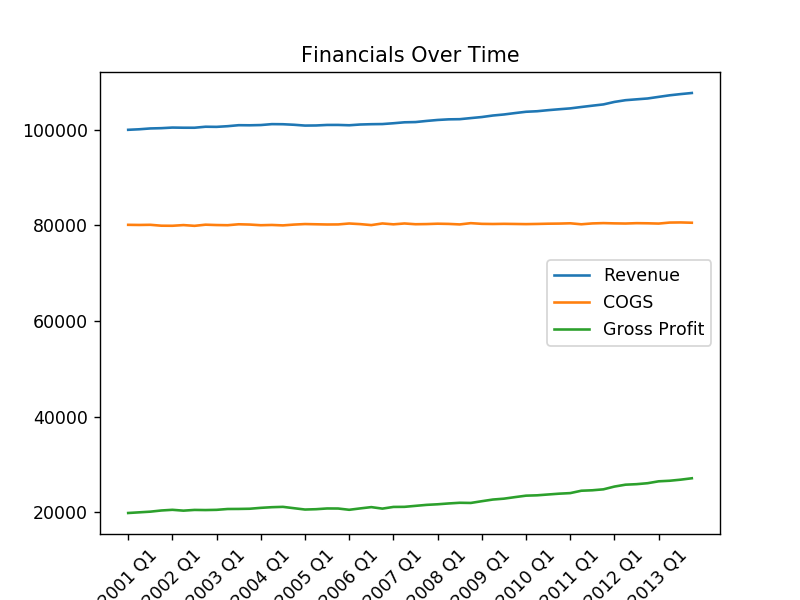

In [18]:
df = pd.read_excel('report_data.xlsx', index_col=0)

fig, ax = plt.subplots(1,1)
ax.plot(df.loc[:,'Revenue':'Gross Profit'])
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=45)
plt.title('Financials Over Time')
plt.legend(labels=('Revenue', 'COGS', 'Gross Profit'), loc='best')
plt.show()
#plt.savefig('full_plot.jpg', dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


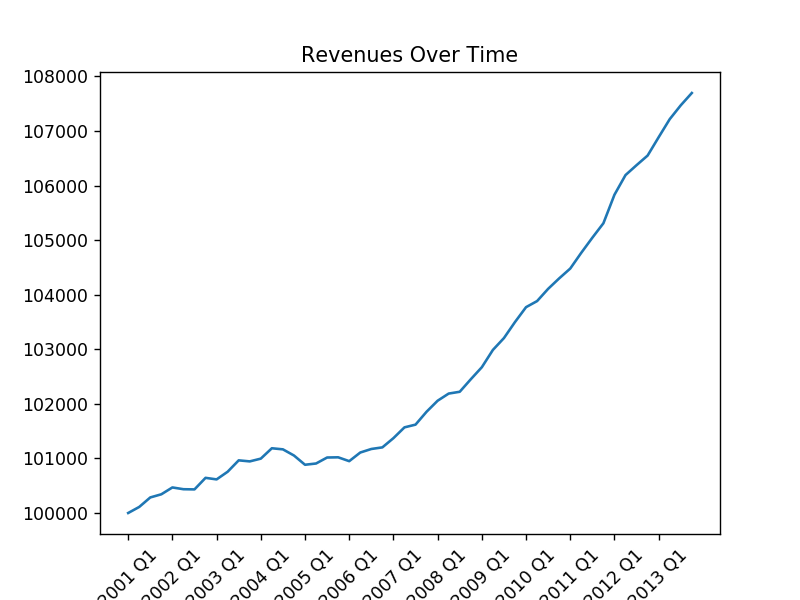

In [35]:
fig, ax = plt.subplots(1,1)
ax.plot(df.Revenue)
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=45)
plt.title('Revenues Over Time')
plt.show()
#plt.savefig('revenue_plot.jpg', dpi=400, bbox_inches='tight')

In [60]:
import win32com.client as win32
import os

#creating a word application object
wordApp = win32.gencache.EnsureDispatch('Word.Application') #create a word application object
wordApp.Visible = True
doc = wordApp.Documents.Add() # create a new application

#Formating the document
doc.PageSetup.RightMargin = 5
doc.PageSetup.LeftMargin = 5
doc.PageSetup.Orientation = win32.constants.wdOrientLandscape
# a4 paper size: 595x842
doc.PageSetup.PageWidth = 595
doc.PageSetup.PageHeight = 842


# Inserting Tables
my_dir=r"C:\Users\henri\Google Drive\School\2018-2019 Carlson MSBA\2018 Programming 6310\trends_marketplace"
filenames = os.listdir(my_dir)
piccount=0
file_count = 0
for i in filenames:
    if i[len(i)-3: len(i)].upper() == 'JPG': # check whether the current object is a JPG file
        piccount = piccount + 1
        #file_count= file_count + 1
print(piccount, " images will be inserted")
total_column = 2
total_row = int(piccount/total_column)+2
rng = doc.Range(0,0)
rng.ParagraphFormat.Alignment = 0
table = doc.Tables.Add(rng,total_row, total_column)
table.Borders.Enable = False
if total_column > 1:
    table.Columns.DistributeWidth()

#Collecting images in the same directory and inserting them into the document
frame_max_width= 167 # the maximum width of a picture
frame_max_height= 125 # the maximum height of a picture


piccount = 1

for index, filename in enumerate(filenames): # loop through all the files and folders for adding pictures
    #if os.path.isfile(os.path.join(os.path.abspath("."), filename)):
    if os.path.isfile(os.path.join(os.path.abspath(my_dir), filename)): # check whether the current object is a file or not
        if filename[len(filename)-3: len(filename)].upper() == 'JPG': # check whether the current object is a JPG file
            piccount = piccount + 1
            print(filename, len(filename), filename[len(filename)-3: len(filename)].upper())


            cell_column = (piccount % total_column + 1) #calculating the position of each image to be put into the correct table cell
            cell_row = (piccount/total_column + 1)
            print('cell_column=%s,cell_row=%s' % (cell_column,cell_row))

            #we are formatting the style of each cell
            cell_range = table.Cell(cell_row, cell_column).Range
            cell_range.ParagraphFormat.LineSpacingRule = win32.constants.wdLineSpaceSingle
            cell_range.ParagraphFormat.SpaceBefore = 0
            cell_range.ParagraphFormat.SpaceAfter = 0

            #this is where we are going to insert the images
            current_pic = cell_range.InlineShapes.AddPicture(os.path.join(os.path.abspath(my_dir), filename))
            width, height = (frame_max_height*frame_max_width/frame_max_height, frame_max_height)

            #changing the size of each image to fit the table cell
            current_pic.Height= height
            current_pic.Width= width

            #putting a name underneath each image which can be handy
            table.Cell(cell_row, cell_column).Range.InsertAfter("\n"+filename)

doc.Content.InsertAfter("\tRevenues have steadily increased while COGS have remained flat.\nThis has " +
                        "generated strong gross profit for the firm over the observed period")
# doc.Content.Font.Size = 11
doc.SaveAs2(my_dir + '\\' + 'henrik.docx')
doc.Close(False)

2  images will be inserted
full_plot.jpg 13 JPG
cell_column=1,cell_row=2.0
revenue_plot.jpg 16 JPG
cell_column=2,cell_row=2.5
